# BI Analyst JR - Test / Análisis de productividad comercial

## Importar librerías necesarias y Dataset

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
df = pd.read_excel('data.xlsx')

## Transformación de datos

### Recalcular las variables de naturaleza calculable
Con la finalidad de darle el formato correcto a los cáculos de porcentajes. Además, esto permite verificar si los datos faltantes/nulos no se calcularon.


In [202]:
#recalcular las variables de naturaleza calculable.
df["0023_cumplimiento"] = df.apply(lambda row: row["0022_ventas"] / row["0021_meta"] if row["0021_meta"] != 0 else 0, axis=1)
df["0045_%_Efectividad_SQL"] = df.apply(lambda row: row["0027_seg_creados_mismo_mes"] / row["0022_ventas"] if row["0022_ventas"] != 0 else 0, axis=1)
df["0044_%_Ventas_mercadeo"] = df.apply(lambda row: (row["0031_ventas_mismo_mes"] + row["0032_ventas_mes_anterior"]) / row["0022_ventas"] if row["0022_ventas"] != 0 else 0, axis=1)
df["0041_%_Ventas_leads_mes"] = df.apply(lambda row: row["0031_ventas_mismo_mes"] / row["0022_ventas"] if row["0022_ventas"] != 0 else 0, axis=1)
df["0042_%_Ventas_leads_mes_anterior"] = df.apply(lambda row: row["0032_ventas_mes_anterior"] / row["0022_ventas"] if row["0022_ventas"] != 0 else 0, axis=1)
df["0043_%_Ventas_leads_cero_a_cien"] = df.apply(lambda row: row["0033_ventas_0_a_100"] / row["0022_ventas"] if row["0022_ventas"] != 0 else 0, axis=1)
df["0029_%_descarte_mismo_mes"] = df.apply(lambda row: row["0028_descartes_mismo_mes"] / row["0027_seg_creados_mismo_mes"] if row["0027_seg_creados_mismo_mes"] != 0 else 0, axis=1)


### Renombrar variables
Las variables tienen nombres,en muchos casos, poco descriptivos. Adicional, permite eliminar los códigos iniciales de las mismas y agregarle el formato en el que se encuentran.

In [203]:
#eliminar espacios (si los hay) en el nombre de las columnas 
df.columns = df.columns.str.strip()

#diccionario para renombrar columnas
rename_dict = {
    'Año_mes':'fecha',
    'Celula':'equipo',
    'Asesor':'asesor_id',
    '0021_meta':'meta',
    '0022_ventas':'ventas',
    '0023_cumplimiento' :'%_cumplimiento',
    '0045_%_Efectividad_SQL':'%_efectividad',
    '0044_%_Ventas_mercadeo':'%_ventas_leads',
    '0031_ventas_mismo_mes':'ventas_leads_mismo_mes',
    '0041_%_Ventas_leads_mes':'%_ventas_leads_mismo_mes',
    '0032_ventas_mes_anterior':'ventas_leads_mes_anterior',
    '0042_%_Ventas_leads_mes_anterior':'%_ventas_leads_mes_anterior',
    '0033_ventas_0_a_100':'ventas_mismo_dia',
    '0043_%_Ventas_leads_cero_a_cien':'%_ventas_mismo_dia',
    '0024_seg_atrasados':'CRM_atrasados',
    '0025_seg_abiertos':'CRM_abiertos',
    '0026_descartes_totales':'descartes_totales',
    '0027_seg_creados_mismo_mes':'CRM_creados_mismo_mes',
    '0028_descartes_mismo_mes':'descartes_mismo_mes',
    '0029_%_descarte_mismo_mes':'%_descarte_mismo_mes',
    '00291_descartes_dia':'descartes_dia',
    '00292_avg_seg_creados_dia':'CRM_avg_leads_creados_dia'
}

#renombrar columnas
df.rename(columns=rename_dict, inplace=True)

### Convertir variable Año_mes a fecha
Esto con la finalidad de poder trabajarlo como series de tiempo lo que después nos permitirá de una forma más sencilla visualizar los datos.

In [204]:
df['fecha'] = pd.to_datetime(df['fecha'].astype(str), format='%Y%m')

### Tratar valores nulos
Identificar valores nulos y su incidencia en el df es importante para saber qué tanto afectará la eliminación de éstos

In [205]:
#cantidad de datos nulos/vacíos
df.isnull().sum()

fecha                           0
equipo                          0
asesor_id                       0
meta                           42
ventas                         42
%_cumplimiento                 42
%_efectividad                  42
%_ventas_leads                 49
ventas_leads_mismo_mes          8
%_ventas_leads_mismo_mes       49
ventas_leads_mes_anterior       8
%_ventas_leads_mes_anterior    49
ventas_mismo_dia                8
%_ventas_mismo_dia             49
CRM_atrasados                  42
CRM_abiertos                   42
descartes_totales              42
CRM_creados_mismo_mes          42
descartes_mismo_mes            42
%_descarte_mismo_mes           42
descartes_dia                  42
CRM_avg_leads_creados_dia      42
dtype: int64

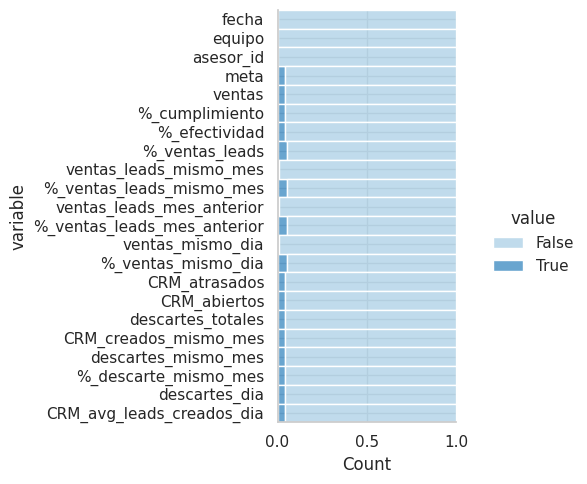

In [206]:
#proporción de datos nulos/vacíos vs el total de datos
sns.displot(
    data=df.isnull().melt(), 
    y='variable', 
    hue='value', 
    multiple='fill',
    palette='Blues',
    aspect=1
)

In [207]:
df.dropna(inplace=True) #eliminar valores nulos

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 0 to 945
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   fecha                        896 non-null    datetime64[ns]
 1   equipo                       896 non-null    object        
 2   asesor_id                    896 non-null    object        
 3   meta                         896 non-null    float64       
 4   ventas                       896 non-null    float64       
 5   %_cumplimiento               896 non-null    float64       
 6   %_efectividad                896 non-null    float64       
 7   %_ventas_leads               896 non-null    float64       
 8   ventas_leads_mismo_mes       896 non-null    float64       
 9   %_ventas_leads_mismo_mes     896 non-null    float64       
 10  ventas_leads_mes_anterior    896 non-null    float64       
 11  %_ventas_leads_mes_anterior  896 non-null    float

### Exportar dataframe limpio

In [209]:
df.to_excel('data_cleaned.xlsx', index=False)

## Análisis

### ¿Qué indicadores demuestran una alta correlación para mantener un cumplimiento alto de los asesores?

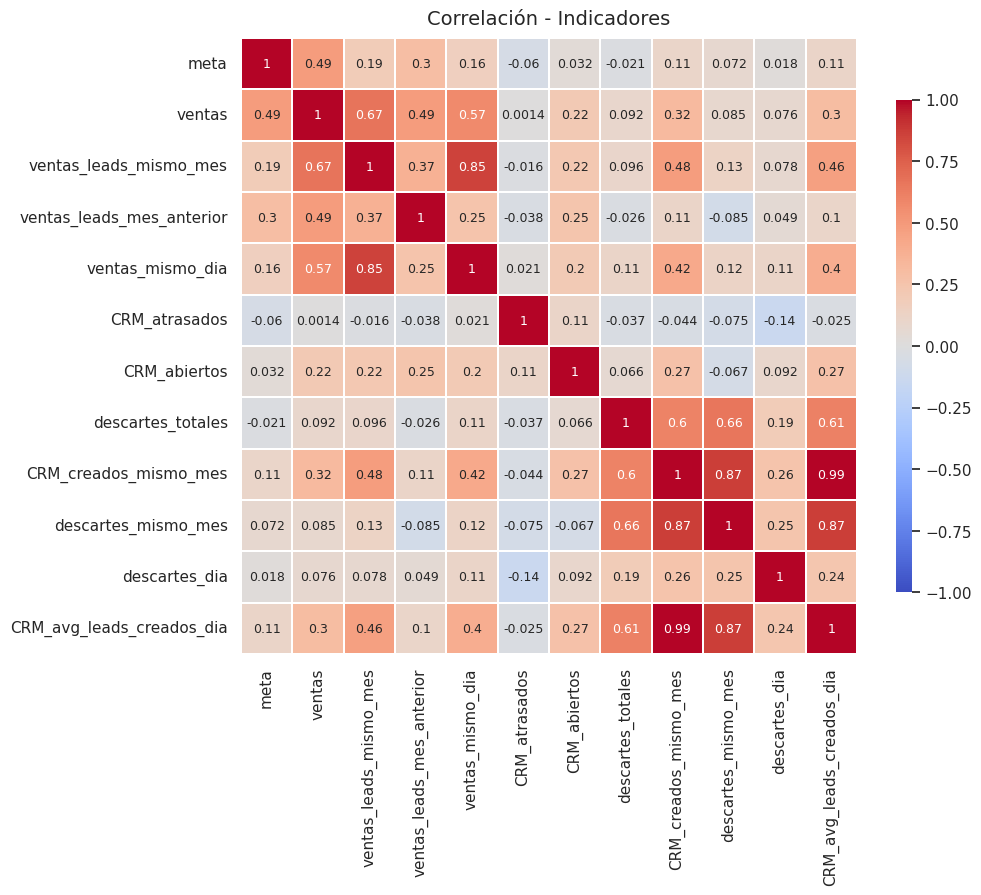

In [210]:
#filtrar columnas que no contienen '%'
columnas_sin_porcentaje = [col for col in df.columns if '%' not in col]

#crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    data=df[columnas_sin_porcentaje].select_dtypes(include='number').corr(),
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,
    annot_kws={"size": 9},
    linewidths=0.3,
    square=True,
    cbar_kws={"shrink": 0.8, "aspect": 30}
)
plt.title("Correlación - Indicadores", fontsize=14, pad=10)
plt.show()


De acuerdo al mapa de correlación, existe una correlación súmamente fuerte con las variables 'ventas_mismo_dia' con 'ventas_leads mismo mes'. lo que indica que las ventas realizadas el mismo día por los leads pivoteados por mercadeo, influyen positivamente en las ventas totales del mes del asesor comercial. Asímismo, a mayor cantidad de leads generados mensualmente, cerca de la mitad son descartes (Puede deberse a muchas razones como por ejemplo la franja horaria.)

A manera de resúmen, es necesario crear una cantidad significante de leads diarios por parte de mercadeo para poder tener ventas significantes en el mes.

### Último periodo 2021

In [211]:
#agrupar por mes y sumar los indicadores seleccionados
indicadores_interes = ['meta', 'ventas', '%_cumplimiento', 'ventas_mismo_dia', 'ventas_leads_mismo_mes', '%_ventas_mismo_dia']
cuadro_comparativo_sum = df[indicadores_interes].groupby(df['fecha'].dt.to_period('M')).sum(numeric_only=True).round(2)

#convertir el índice a columna de fecha en formato datetime
cuadro_comparativo_sum = cuadro_comparativo_sum.reset_index()
cuadro_comparativo_sum['fecha'] = cuadro_comparativo_sum['fecha'].dt.to_timestamp()


In [212]:
#agrupar y sumar los indicadores
cuadro_comparativo_sum = df[indicadores_interes].groupby(df['fecha'].dt.to_period('M')).sum(numeric_only=True).round(2)
cuadro_comparativo_sum

,meta,ventas,%_cumplimiento,ventas_mismo_dia,ventas_leads_mismo_mes,%_ventas_mismo_dia
fecha,,,,,,
2021-01,4228.0,2494.0,55.15,453.0,1108.0,16.02
2021-02,5075.0,3191.0,56.09,595.0,1329.0,16.32
2021-03,3867.0,2884.0,56.99,546.0,1237.0,14.77
2021-04,4099.0,2743.0,49.52,443.0,1029.0,12.24
2021-05,3437.0,2429.0,48.75,473.0,974.0,13.34
2021-06,3662.0,2431.0,47.78,427.0,910.0,13.19
2021-07,3577.0,2264.0,45.88,446.0,1048.0,14.95
2021-08,2998.0,2768.0,66.63,632.0,1382.0,16.26
2021-09,3567.0,2352.0,45.25,505.0,1072.0,15.10


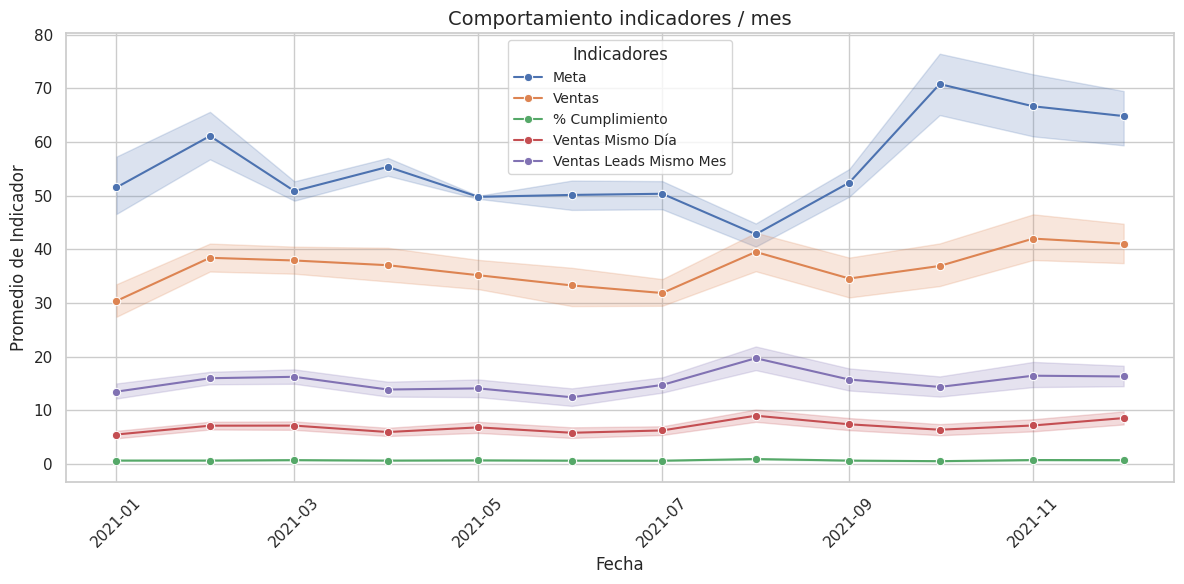

In [213]:
#gráfico
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="fecha", y="meta", label="Meta", marker="o")
sns.lineplot(data=df, x="fecha", y="ventas", label="Ventas", marker="o")
sns.lineplot(data=df, x="fecha", y="%_cumplimiento", label="% Cumplimiento", marker="o")
sns.lineplot(data=df, x="fecha", y="ventas_mismo_dia", label="Ventas Mismo Día", marker="o")
sns.lineplot(data=df, x="fecha", y="ventas_leads_mismo_mes", label="Ventas Leads Mismo Mes", marker="o")

plt.title("Comportamiento indicadores / mes", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Promedio de Indicador", fontsize=12)
plt.legend(title="Indicadores", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Viendo los gráficos para cada una de las variables de interés, se puede evidenciar que el mes de diciembre fue un mes bueno debido a que fue el cuarto mes con meta más alta sin embargo, hubo un cumplimiento del 57.69% y fue el mejor mes en ventas_mismo_dia con 661. 

### Descriptivos estadísticos promedio, máximo, mínimo, etc. de indicadores 2021 por asesor y equipo 


In [214]:
indicadores = ['meta', 'ventas', '%_cumplimiento', 'ventas_mismo_dia', 'ventas_leads_mismo_mes'] #variables de interés
tabla_agrupada_equipo = df.groupby(['equipo'])[indicadores].describe().T
tabla_agrupada_equipo = tabla_agrupada_equipo.round(2)
tabla_agrupada_equipo

equipo                           DG1     DG2     DG3     DG4     DG5     DG6
meta                   count  162.00  157.00  156.00  150.00  113.00  158.00
                       mean    56.56   55.32   55.51   57.49   56.22   53.93
                       std     18.27   19.68   18.91   17.59   21.09   19.29
                       min     11.00   10.00   11.00   13.00   10.00   10.00
                       25%     47.00   47.00   47.00   49.25   40.00   47.00
                       50%     55.00   55.00   55.00   55.00   57.00   55.00
                       75%     77.00   77.00   71.75   77.00   77.00   66.50
                       max     83.00   83.00   83.00   83.00   83.00   83.00
ventas                 count  162.00  157.00  156.00  150.00  113.00  158.00
                       mean    36.34   40.20   38.51   33.98   33.76   35.85
                       std     13.80   17.91   15.01   12.05   12.81   16.71
                       min      4.00    5.00    3.00    4.00    3.00    2.00
                       25%     27.25   28.00   29.75   26.00   25.00   24.00
                       50%     37.00   40.00   38.50   34.00   34.00   35.00
                       75%     45.00   54.00   47.00   42.00   42.00   43.00
                       max     78.00   92.00   91.00   73.00   73.00  100.00
%_cumplimiento         count  162.00  157.00  156.00  150.00  113.00  158.00
                       mean     0.69    0.78    0.74    0.64    0.67    0.71
                       std      0.31    0.31    0.33    0.25    0.32    0.33
                       min      0.09    0.18    0.09    0.05    0.05    0.15
                       25%      0.48    0.58    0.55    0.48    0.48    0.51
                       50%      0.66    0.73    0.68    0.61    0.61    0.67
                       75%      0.83    1.00    0.86    0.77    0.77    0.86
                       max      2.55    1.70    2.27    1.47    1.94    2.45
ventas_mismo_dia       count  162.00  157.00  156.00  150.00  113.00  158.00
                       mean     7.11    7.77    7.08    6.59    6.36    6.59
                       std      4.31    5.02    3.88    4.11    4.71    4.29
                       min      0.00    1.00    1.00    0.00    0.00    0.00
                       25%      4.00    4.00    4.00    3.00    4.00    3.25
                       50%      7.00    6.00    7.00    6.00    5.00    6.00
                       75%     10.00   11.00    9.00    9.00    8.00    9.00
                       max     24.00   25.00   25.00   22.00   31.00   22.00
ventas_leads_mismo_mes count  162.00  157.00  156.00  150.00  113.00  158.00
                       mean    14.54   17.39   15.93   14.77   14.03   14.85
                       std      7.01    9.48    6.57    7.72    7.70    8.24
                       min      0.00    3.00    3.00    1.00    1.00    2.00
                       25%     10.00   10.00   11.75    9.00    9.00    9.00
                       50%     14.00   15.00   16.00   14.00   13.00   13.00
                       75%     19.00   23.00   20.00   19.75   17.00   18.00
                       max     38.00   50.00   45.00   42.00   43.00   52.00

In [215]:
tabla_agrupada_asesor_id = df.groupby(['asesor_id'])[indicadores].describe().T
tabla_agrupada_asesor_id = tabla_agrupada_asesor_id.round(2)
tabla_agrupada_asesor_id

asesor_id                        A1   A100   A101   A102   A103   A104   A106  \
meta                   count   8.00   2.00  12.00   4.00  12.00   7.00   2.00   
                       mean   43.62  27.50  65.17  68.25  54.25  58.57  12.00   
                       std    11.44   7.78  13.54  10.31  19.29   8.89   1.41   
                       min    22.00  22.00  47.00  57.00  22.00  50.00  11.00   
                       25%    38.25  24.75  55.00  60.75  45.25  54.50  11.50   
                       50%    47.00  27.50  59.50  69.50  52.50  55.00  12.00   
                       75%    51.25  30.25  77.50  77.00  62.50  59.50  12.50   
                       max    55.00  33.00  83.00  77.00  83.00  77.00  13.00   
ventas                 count   8.00   2.00  12.00   4.00  12.00   7.00   2.00   
                       mean   21.25  15.00  40.17  36.50  28.67  29.71  29.00   
                       std     6.45   0.00   7.20   9.85  10.59  15.80   2.83   
                       min    12.00  15.00  30.00  24.00   9.00  14.00  27.00   
                       25%    17.75  15.00  34.75  33.00  23.00  17.00  28.00   
                       50%    20.00  15.00  40.00  37.00  29.00  24.00  29.00   
                       75%    24.00  15.00  43.25  40.50  36.00  40.50  30.00   
                       max    31.00  15.00  55.00  48.00  43.00  55.00  31.00   
%_cumplimiento         count   8.00   2.00  12.00   4.00  12.00   7.00   2.00   
                       mean    0.53   0.57   0.64   0.55   0.55   0.51   2.42   
                       std     0.23   0.16   0.18   0.16   0.19   0.30   0.05   
                       min     0.30   0.45   0.36   0.31   0.28   0.25   2.38   
                       25%     0.37   0.51   0.53   0.51   0.42   0.31   2.40   
                       50%     0.41   0.57   0.66   0.60   0.52   0.39   2.42   
                       75%     0.67   0.62   0.71   0.63   0.61   0.61   2.44   
                       max     0.94   0.68   1.06   0.67   0.94   1.10   2.45   
ventas_mismo_dia       count   8.00   2.00  12.00   4.00  12.00   7.00   2.00   
                       mean    6.12   2.50   5.00   7.00   7.92   7.57   7.00   
                       std     3.14   0.71   2.41   2.16   3.42   3.36   5.66   
                       min     2.00   2.00   2.00   4.00   2.00   3.00   3.00   
                       25%     3.75   2.25   3.75   6.25   5.50   6.50   5.00   
                       50%     6.00   2.50   4.50   7.50   9.50   7.00   7.00   
                       75%     8.25   2.75   5.50   8.25  10.25   8.00   9.00   
                       max    11.00   3.00  11.00   9.00  12.00  14.00  11.00   
ventas_leads_mismo_mes count   8.00   2.00  12.00   4.00  12.00   7.00   2.00   
                       mean   12.50   8.00  12.50  14.75  17.50  15.14  20.50   
                       std     5.48   1.41   3.37   4.43   5.76   7.52   0.71   
                       min     6.00   7.00   6.00  10.00   5.00   7.00  20.00   
                       25%     9.00   7.50  11.00  11.50  15.75  11.00  20.25   
                       50%    12.00   8.00  12.50  15.00  19.00  12.00  20.50   
                       75%    15.25   8.50  14.25  18.25  21.00  18.50  20.75   
                       max    21.00   9.00  19.00  19.00  25.00  28.00  21.00   

asesor_id                      A107   A108   A109  ...    A90    A91    A92  \
meta                   count   7.00  12.00  12.00  ...   3.00  12.00   5.00   
                       mean   34.00  55.75  52.08  ...  31.67  54.25  64.60   
                       std    16.82  17.34  17.10  ...   9.07  19.29  12.10   
                       min    13.00  33.00  22.00  ...  22.00  22.00  50.00   
                       25%    21.50  45.75  45.25  ...  27.50  45.25  57.00   
                       50%    31.00  52.50  52.50  ...  33.00  52.50  62.00   
                       75%    48.00  62.50  57.00  ...  36.50  62.50  77.00   
                       max    55.00  83.00  83

### Segmentación: Bajo, medio y alto.
Basándonos en la estrategia de la empresa de que los asesores logren el mayor cumplimiento de la meta y aprovechamiento de los leads generados por mercadeo se escogieron las siguiente variables para la segmentación:
- %_cumplimiento: nos permite conocer qué tan cerca está su gestión de la meta.
- %_ventas_leads_mismo_mes: presenta qué tanto aprovecha los leads generados por mercadeo en el mes.
- ventas_mismo_dia: demuestra cuánto puede cerrar el asesor el mismo día que se le asigna el lead.

Para lograr la segmentación, tendremos en cuenta los percentiles. Que por definición, nos dividen la distribución de datos en 4 partes: datos <= 25%, datos <= 50% y <= 75% y datos > 75%.

In [216]:
#variables clave para la segmentación
variables = ['%_cumplimiento', '%_ventas_leads_mismo_mes', 'ventas_mismo_dia']
percentiles = df[variables].describe(percentiles=[0.25, 0.5, 0.75]).loc[['25%', '50%', '75%']]

def asignacion_segmento(row, col): #asignación de segmento
    if row[col] <= percentiles.loc['25%', col]:
        return 'Bajo'
    elif row[col] <= percentiles.loc['75%', col]:
        return 'Medio'
    else:
        return 'Alto'

for variable in variables:
    df[f'segmento_{variable}'] = df.apply(lambda row: asignar_segmento(row, variable), axis=1)

def asignacion_segmento_general(row):
    if all(row[f'segmento_{var}'] == 'Alto' for var in variables):
        return 'Alto'
    elif any(row[f'segmento_{var}'] == 'Medio' for var in variables):
        return 'Medio'
    else:
        return 'Bajo'

df['segmento_general'] = df.apply(asignacion_segmento_general, axis=1)

distribucion_segmento_general = df['segmento_general'].value_counts()
distribucion_segmento_general

segmento_general
Medio    747
Bajo     105
Alto      44
Name: count, dtype: int64

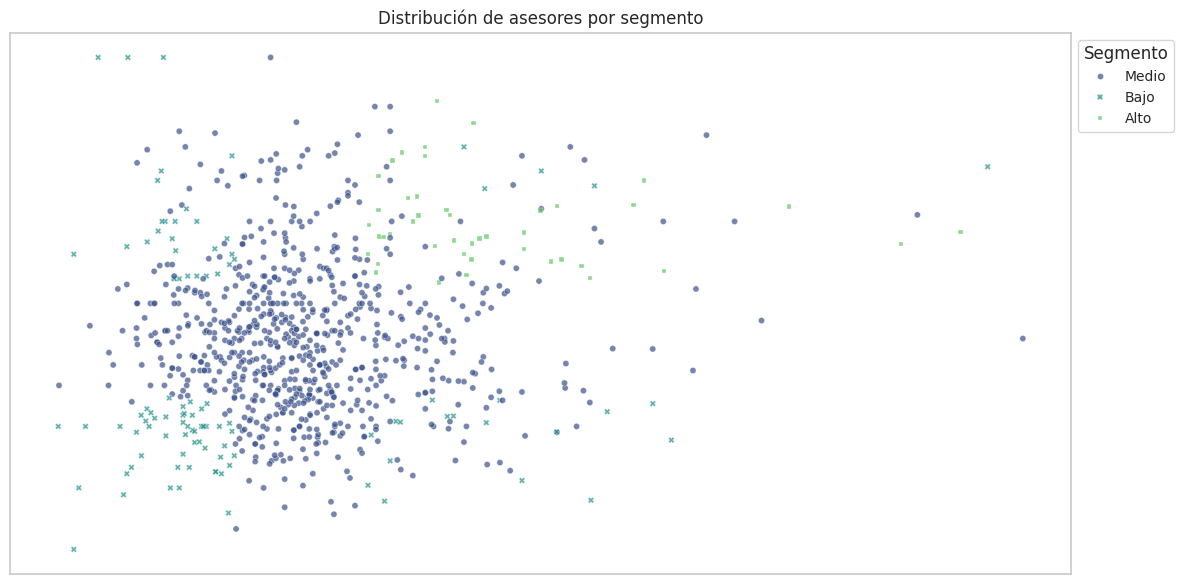

In [217]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='%_cumplimiento',
    y='%_ventas_leads_mismo_mes',
    hue='segmento_general',
    style='segmento_general',
    palette='viridis',
    s=20,
    alpha=0.7
)
plt.title("Distribución de asesores por segmento", fontsize=12)
plt.xlabel("")
plt.xticks([])
plt.ylabel("")
plt.yticks([])
plt.legend(title="Segmento", fontsize=10, bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()




### Participación de asesores en el segmento alto

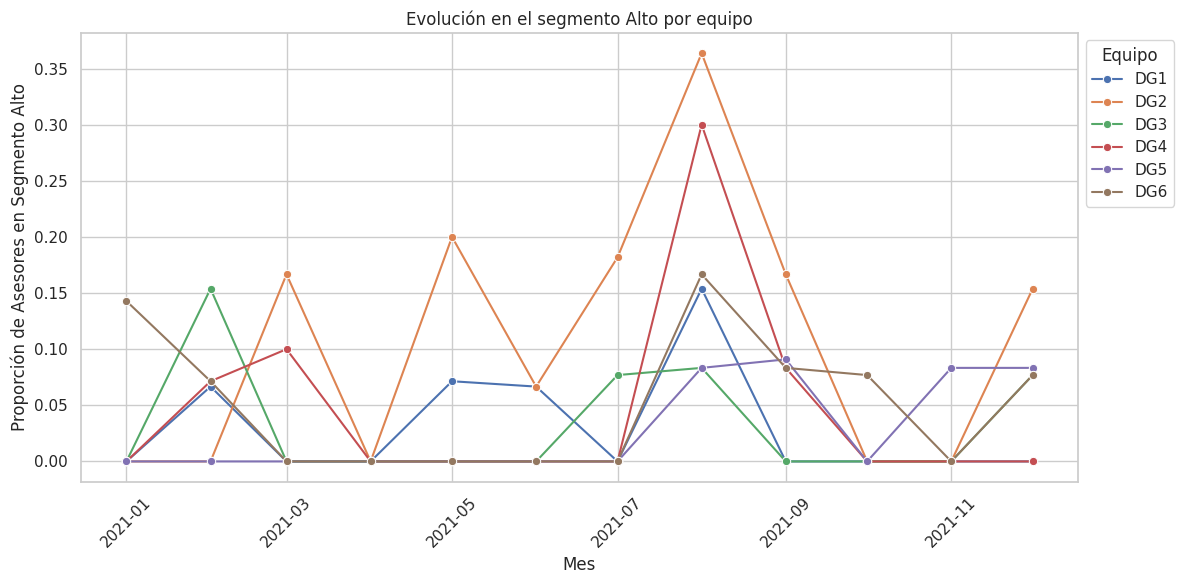

equipo
DG1     5
DG2    16
DG3     5
DG4     6
DG5     4
DG6     8
dtype: int64

In [218]:
df['mes'] = df['fecha'].dt.to_period('M').dt.to_timestamp()

evolucion_segmentos = df.groupby(['mes', 'equipo', 'segmento_general']).size().unstack(fill_value=0)
evolucion_segmentos['Total'] = evolucion_segmentos.sum(axis=1)

evolucion_segmentos['Proporcion_Alto'] = evolucion_segmentos['Alto'] / evolucion_segmentos['Total'] # Calcular la proporción de asesores en el segmento "Alto" por equipo y mes
proporcion_segmento_alto = evolucion_segmentos[['Proporcion_Alto']].reset_index()

# Creación del gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=proporcion_segmento_alto,
    x='mes',
    y='Proporcion_Alto',
    hue='equipo',
    marker='o'
)
plt.title("Evolución en el segmento Alto por equipo", fontsize=12)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Proporción de Asesores en Segmento Alto", fontsize=12)
plt.legend(title="Equipo", bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


total_segmento_alto = df[df['segmento_general'] == 'Alto'].groupby('equipo').size() # Total acumulado por segmento

total_segmento_alto


In [219]:
#filtro por segmento alto
asesores_alto = df[df['segmento_general'] == 'Alto']

#participacion de asesores en el segmento alto
participacion_segmento_alto = asesores_alto.groupby('equipo').size()
porcentaje_segmento_alto = (participacion_segmento_alto / df['equipo'].value_counts()) * 100

#combinación de variables
participacion_alto_df = pd.DataFrame({
    'Cantidad_Alto': participacion_segmento_alto,
    'Porcentaje_Alto': porcentaje_segmento_alto
}).fillna(0)

participacion_alto_df


,Cantidad_Alto,Porcentaje_Alto
equipo,,
DG1,5,3.086420
DG2,16,10.191083
DG3,5,3.205128
DG4,6,4.000000
DG5,4,3.539823
DG6,8,5.063291


#### Resumen de indicadores clave

In [ ]:

variables = ['%_cumplimiento', '%_ventas_leads_mismo_mes', 'ventas_mismo_dia']

#calcular promedio general y percentil 75 para cada indicador
resumen_indicadores = df[variables].agg(['mean', lambda x: x.quantile(0.75)])
resumen_indicadores.rename(index={'mean': 'Promedio General', '<lambda>': 'Percentil 75'}, inplace=True)
distribucion_segmentos = df['segmento_general'].value_counts(normalize=True).mul(100).round(2)

#evolucion mes a mes
df['mes'] = df['fecha'].dt.to_period('M')  # Asegurar que "mes" esté disponible
evolucion_segmentos = df.groupby(['mes', 'equipo', 'segmento_general']).size().unstack(fill_value=0)
evolucion_segmentos['Total'] = evolucion_segmentos.sum(axis=1)
evolucion_segmentos['Proporcion_Alto'] = evolucion_segmentos['Alto'] / evolucion_segmentos['Total']
proporcion_segmento_alto = evolucion_segmentos['Proporcion_Alto'].unstack(fill_value=0)

#resumen
print("Indicadores:")
print(resumen_indicadores)
print("\nDistribución de segmentos:")
print(distribucion_segmentos)
print("\nEvolución mes segmento alto:")
print(proporcion_segmento_alto)


Resumen de Indicadores Clave:
                  %_cumplimiento  %_ventas_leads_mismo_mes  ventas_mismo_dia
Promedio General        0.705767                  0.435249          6.949777
Percentil 75            0.842105                  0.540822          9.000000

Distribución General de los Segmentos:
segmento_general
Medio    83.37
Bajo     11.72
Alto      4.91
Name: proportion, dtype: float64

Evolución Mes a Mes por Equipo (Segmento Alto):
equipo        DG1       DG2       DG3       DG4       DG5       DG6
mes                                                                
2021-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.142857
2021-02  0.066667  0.000000  0.153846  0.071429  0.000000  0.071429
2021-03  0.000000  0.166667  0.000000  0.100000  0.000000  0.000000
2021-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2021-05  0.071429  0.200000  0.000000  0.000000  0.000000  0.000000
2021-06  0.066667  0.066667  0.000000  0.000000  0.000000  0.000000
2021-07  0.

Comparativo:
- Generalmente, los asesores tienen un 71% de cumplimiento, sin embargo los asesores en el segmento alto logran el 84% de cumplimiento respecto a su meta planteada.
- Por otro lado, os asesores alcanzan el 44% de ventas en el mes con leads frescos, pero los asesores del segmento alto convierten un 54% de sus ventas.
- Los asesores del top 25% logran 2 ventas más al día con leads frescos proporcionados por mercadeo.